## Observations and Insights

## Dependencies and starter code

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

result = pd.merge(mouse_metadata,
                 study_results,
                 on='Mouse ID', 
                 how='outer')

result.head()


# Combine the data into a single dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [8]:
Variance = result.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
Mean = result.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Median = result.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
std = result.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = result.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].apply(st.sem)


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar plots

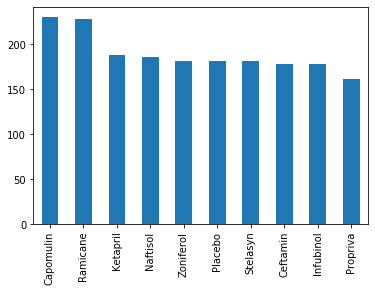

In [9]:
Bar_Plots = result['Drug Regimen'].value_counts().plot(kind='bar')


# Generate a bar plot showing number of data points for each treatment regimen using pandas

## Pie plots

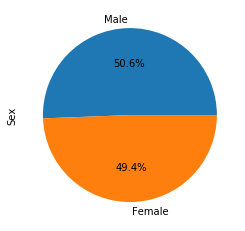

In [10]:
Pie_Plots = result['Sex'].value_counts().plot(kind='pie' , autopct='%1.1f%%')

# Generate a pie plot showing the distribution of female versus male mice using pandas

## Quartiles, outliers and boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#delete those treatment that does not have the max timepoint

mmax = result['Timepoint'].max()
treatment_list = [mmax]
newresult = result[result['Timepoint'].isin(treatment_list)]

newresult_promissing = newresult.loc[result.groupby(['Mouse ID','Drug Regimen'], sort=True)['Timepoint'].idxmax()][['Mouse ID','Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
newresult_promissing_mean = newresult_promissing.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean() 

newresult_promissing_4 = pd.DataFrame({"Average": newresult_promissing_mean
                                  })     

newresult_promissing_4 = newresult_promissing_4.sort_values(by = ['Average'], ascending = [True]) 
summary_table = newresult_promissing_4.head(4)


newresult_promissing_4 = newresult_promissing_4.reset_index()
# summary_table2 = summary_table2.reset_index()
summary_table



C:\Users\mansoureh.izadi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


,Average
Drug Regimen,
Ramicane,34.955595
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562


In [12]:
ttyy=newresult_promissing_4['Average']

quartiles = ttyy.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 64.53820657155983
The upper quartile of temperatures is: 68.34975337772727
The interquartile range of temperatures is: 3.811546806167442
The the median of temperatures is: 66.10970828892857 
Values below 58.82088636230866 could be outliers.
Values above 74.06707358697844 could be outliers.


Text(0, 0.5, '')

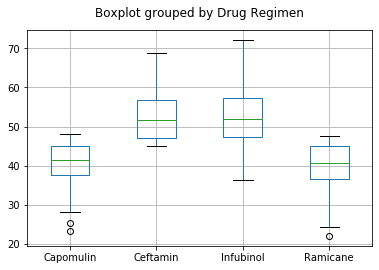

In [16]:
treatment_list = list(summary_table.index.values)

top_treatments_df =  result[result['Drug Regimen'].isin(treatment_list)]
top_treatments_df


bp = top_treatments_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')

bp.get_figure().gca().set_title("")
bp.get_figure().gca().set_xlabel("")
bp.get_figure().gca().set_ylabel("")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [10]:
# Capomulin = result.loc[result['Drug Regimen'] == "Capomulin"][['Mouse ID','Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
# Capomulin_avg = Capomulin.groupby(['Timepoint'])['Tumor Volume (mm3)'].mean() 

Capomulin = result.loc[(result['Drug Regimen'] == "Capomulin")&(result['Mouse ID'] == "l509")][['Timepoint','Tumor Volume (mm3)']]
new_tum_line = Capomulin.reset_index()


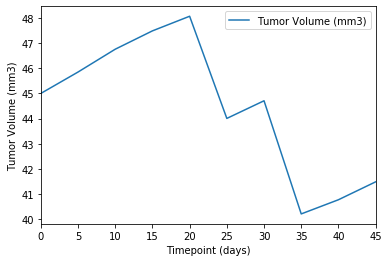

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lines = new_tum_line.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulinweight = result.loc[result['Drug Regimen'] == "Capomulin"][['Mouse ID','Drug Regimen', 'Weight (g)', 'Tumor Volume (mm3)']]
CapomulinweightE = Capomulinweight.groupby(['Drug Regimen','Weight (g)']).mean()

new_tum_scat = CapomulinweightE.reset_index()


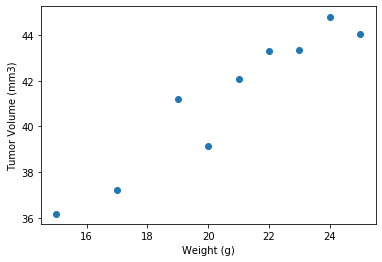

In [13]:
plt.scatter(new_tum_scat['Weight (g)'],new_tum_scat['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



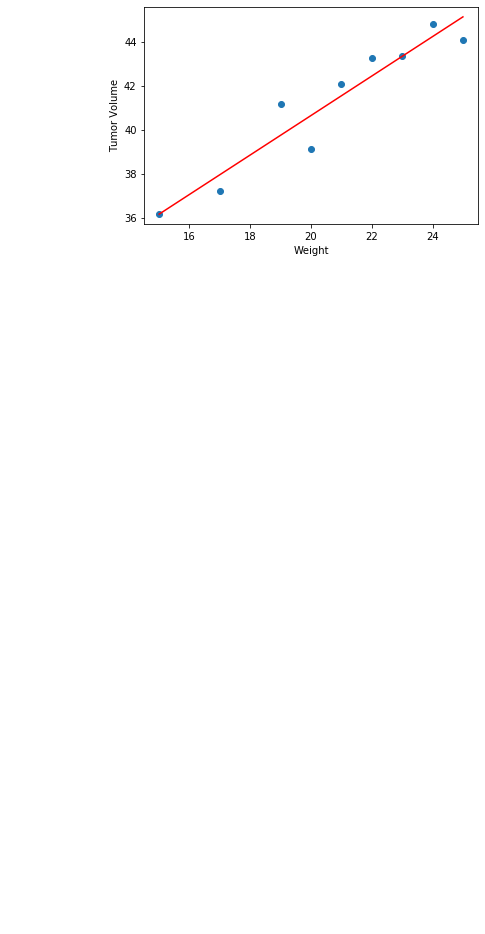

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = new_tum_scat['Weight (g)']
y_values = new_tum_scat['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,4),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()